# Feature engineering and analysis

## GIS machine learning training and evaluation

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# load the shape file data
path = r"C:\Users\Shikhar Paudel\Desktop\week6 practice\EDA_GIS\Data\ServiceDistricts.shp"

# reading the shapefile data
gdf = gpd.read_file(path)
# .shx is the index file whgere .shp is the original file

## Buffer : A zone around a geographic feature( eg a 0.5- degree bufferZone around the polygon).

In [9]:
# create a buffer of 0.5 units around each polygon
gdf['buffer'] = gdf.geometry.buffer(0.5)
print(gdf[['geometry','buffer']])

                                            geometry  \
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...   
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...   

                                              buffer  
0  POLYGON ((1694510.719 643580.137, 1694519.91 6...  
1  MULTIPOLYGON (((1694089.268 645095.353, 169411...  


## Centroid: The central point of the polygon that represents the "center" of the polygon

In [13]:
# create a centeroid point of the polygons
gdf['centroid'] = gdf.geometry.centroid
print(gdf[['geometry','centroid']])

                                            geometry  \
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...   
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...   

                         centroid  
0  POINT (1747906.016 658532.734)  
1  POINT (1730139.064 675795.933)  


## Area: The toatal are of the polygon
## perimeter: the total perimeter (boundary length) of the polygon.

In [15]:
# calculate the area and peremeter of each polygon
gdf['area'] = gdf.geometry.area
gdf['peremeter'] = gdf.geometry.length

print(gdf[['geometry','area','peremeter']])

                                            geometry          area  \
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...  5.513380e+09   
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...  9.128327e+09   

      peremeter  
0  7.673590e+05  
1  1.381010e+06  


## Distance to first polygon: The distance from the centeroid of each polygon to the first polygon's centeroid

In [17]:
# calculate the distance between the centroids of each polygon and the first polygon
gdf['distance_to_first'] = gdf['centroid'].distance(gdf['centroid'].iloc[0])
print(gdf[['centeroid','distance_to_first']])

                        centeroid  distance_to_first
0  POINT (1747906.016 658532.734)            0.00000
1  POINT (1730139.064 675795.933)        24772.61836


# Machine Learning in GIS

In [18]:
! pip install scikit-learn

In [19]:
import folium
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [22]:
# creating a sample geodataframe
data = {
    'longitude':np.random.uniform(-180,180,1000),
    'latitude':np.random.uniform(-90,90,1000),
    'class':np.random.choice([0,1],size = 1000) # random class 0 or 1 for classification
}

In [24]:
# create a data frame
df = pd.DataFrame(data)
# create a geo data frame
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))

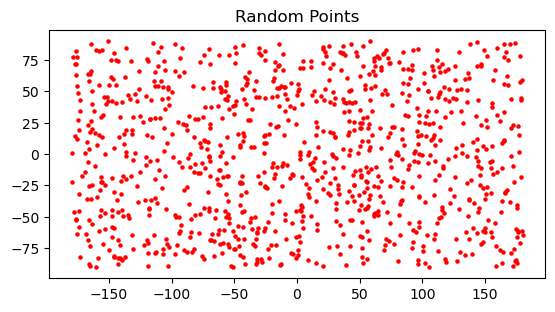

In [25]:
# plotting the points on a map
gdf.plot(marker = 'o', color ='red', markersize = 5)
plt.title('Random Points')
plt.show()

In [30]:
# split the data set into features(X) AND labels (Y)
x = df[['latitude','longitude']]
y = df['class']

In [31]:
# split the data into training and testing sets
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [33]:
# initilize and train the model
model = RandomForestClassifier(n_estimators = 100, random_state = 42) # n-estimatior means that the model creates 100 decision trees/ random_state is a number same reasult each time you run code
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# make prediction
y_pred = model.predict(X_test)

In [36]:
# evaluate the model
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.55

 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.69      0.58        90
           1       0.63      0.44      0.52       110

    accuracy                           0.55       200
   macro avg       0.57      0.56      0.55       200
weighted avg       0.57      0.55      0.54       200



In [37]:
# show the importance of each feature
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.50928872 0.49071128]


# Machine Learning for Land Use

In [38]:
# Generate random latitudes and longitudes
n = 1000
np.random.seed(42)
latitudes = np.random.uniform(low = 20.0, high=50.0, size = n)
longitudes = np.random.uniform(low = 120.0, high = -60.0, size = n)

In [52]:
# Generate random land use classification (urban =1 Rural = 0)
land_use = np.random.choice([0,1], size = n)

In [53]:
# create a data frame with these values
data = pd.DataFrame({
  'latitude':latitudes,
  'longitude':longitudes,
  'land_use':land_use
})

In [54]:
# convert to a geoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data.longitude, data.latitude))

In [55]:
gdf.tail()

,latitude,longitude,land_use,geometry
995,22.747462,1.748072,1,POINT (1.74807 22.74746)
996,47.519407,-52.190632,0,POINT (-52.19063 47.51941)
997,24.104559,107.587557,1,POINT (107.58756 24.10456)
998,48.507121,109.730150,0,POINT (109.73015 48.50712)
999,33.380173,69.206327,0,POINT (69.20633 33.38017)


In [56]:
gdf.sample(3)

,latitude,longitude,land_use,geometry
124,26.838055,2.056443,1,POINT (2.05644 26.83805)
508,48.493997,10.577083,1,POINT (10.57708 48.494)
167,25.595555,28.655808,0,POINT (28.65581 25.59556)


# Data Cleaning

In [58]:
# check for missing valuyes
gdf.isnull().sum()

latitude     0
longitude    0
land_use     0
geometry     0
dtype: int64

In [60]:
# check for duplicate
gdf.duplicated().sum()

0

## Data Visualization

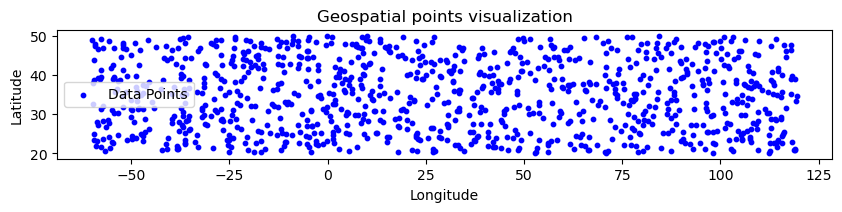

In [66]:
# plot the points on the map using geopandas
fig,ax = plt.subplots(figsize = (10,10))
# plot the points
gdf.plot(ax = ax, color = 'blue', marker = 'o', markersize = 10, label = "Data Points")
# Add title and subtitles 
plt.title("Geospatial points visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

#plt.show()
plt.show()

In [84]:
# creating a map centered to a average latitude and longitude of the point.
map_centered = [gdf['latitude'].mean(),gdf['longitude'].mean()]
our_map = folium.Map(location = map_centered, zoom_start=7)


In [82]:
# Add a marker for the each point in the gdf
for idx, row in gdf.iterrows():
    lat = row['latitude']
    lon=row['longitude']
    folium.Marker(
        location = [lat,lon],
        popup = f"ID: {idx}\nLand Use: {'Urban' if row['land_use']==1 else 'Rural'}",
        icon = folium.Icon(color = "blue" if row['land_use']==1 else "green")).add_to(our_map)
    

In [83]:
# displaying the map
our_map

## Machine Learning

In [85]:
# Feature selection and data Prepration
X = gdf[['latitude','longitude']]# Features latitude and longitude
y = gdf['land_use'] # Target Variable (land use)

In [86]:
# split the data into train test sets
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [87]:
model =  RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [88]:
# make predictions
y_pred = model.predict(X_test)

In [89]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       145
           1       0.51      0.48      0.50       155

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300

